In [4]:
import sys
sys.path.insert(0, "..")
from eis_toolkit.exploratory_analyses.local_morans_i import local_morans_i

import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

['..', '..', '..', '/eis_toolkit/notebooks', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/root/.cache/pypoetry/virtualenvs/eis-toolkit-QEzTY9B6-py3.10/lib/python3.10/site-packages']


In [10]:
# Load a dataset 
gdf = gpd.read_file("../tests/data/remote/IOCG_CLB_Till_Geochem_reg_511p.gpkg")

#Select a column for analysis
column = "Li_ppm_511"

gdf_result = local_morans_i(gdf, column, 'knn', 3, 999)

/root/.cache/pypoetry/virtualenvs/eis-toolkit-QEzTY9B6-py3.10/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


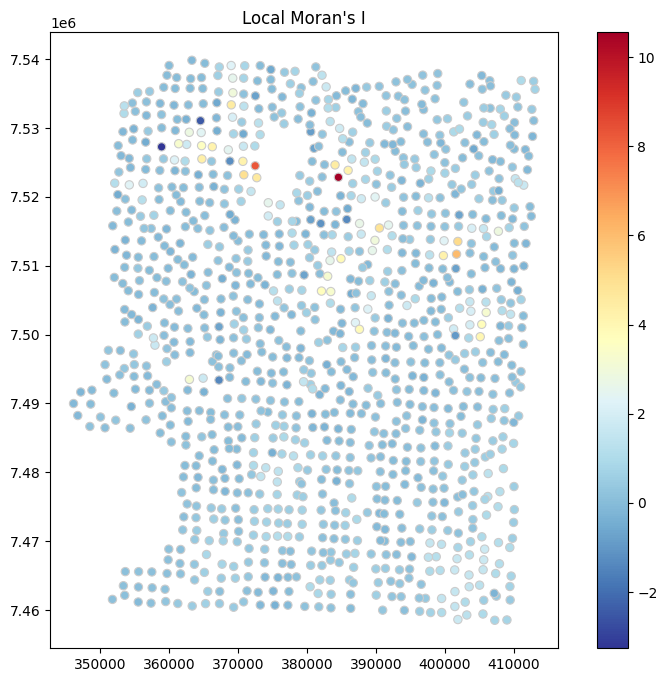

In [13]:
# Plot Moran Scatterplot
fig, ax = plt.subplots(figsize=(10, 8))
gdf_result.plot(column=f'{column}_local_moran_I', cmap='RdYlBu_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Local Moran\'s I')
plt.show()